**Labb 4**


Johannes Hedström

# Del A

Läser in w2v som är tränat på google news dataset och testar några "uträkningar".

In [ ]:
# Läser in word2vec-modellen
import gensim.downloader as api

w2v = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
w2v.most_similar_cosmul(positive=['gin_tonic', 'chips', 'england'],negative=['food']) # "Beräknar" några ord

[('hudd', 0.5983690023422241),
 ('walcott', 0.5778842568397522),
 ('ibanez', 0.5778675675392151),
 ('xavi', 0.575094997882843),
 ('dawson', 0.5721470713615417),
 ('jenas', 0.5717865824699402),
 ('gerrard', 0.5716738700866699),
 ('judd', 0.5711452960968018),
 ('john_terry', 0.5678044557571411),
 ('adebayor', 0.5673997402191162)]

Intressant att en kombination mellan, gin tonic, chips(pommes frites?) och england minus mat blir 8(inte hudd och judd) fotbollspelare där några (xavi och adebayor) inte är från storbritanien, är fotbollspelare så förknippad med sprit? haha

In [ ]:
w2v.most_similar_cosmul(positive=["music", 'sweden']) # "Beräknar" några ord


[('jonas_brothers', 0.525708019733429),
 ('john_mayer', 0.5141240954399109),
 ('musi', 0.5109066367149353),
 ('dj', 0.5062492489814758),
 ('radiohead', 0.5053653120994568),
 ('read_Annadata_Patrika', 0.5042223930358887),
 ('musik', 0.5040066242218018),
 ('beyonce', 0.5014923810958862),
 ('rnb', 0.4986725449562073),
 ('kanye', 0.49725842475891113)]

Genom att ta musik och sverige tillsammans så kommer ingen svensk artist upp, däremot så ser vi att svenska stavningen på music är med, samt dj vilket den svenska musikindistrin varit förknippad med de senaste årtiondet. Möjligtvis att modellen inte tränat på så många svenska artister.

In [ ]:
w2v.most_similar_cosmul(positive=['father', 'kid'], negative=['female']) # "Beräknar" några ord

[('dad', 1.4382197856903076),
 ('grandpa', 1.3316593170166016),
 ('son', 1.3128588199615479),
 ('uncle', 1.3099697828292847),
 ('grandfather', 1.2489652633666992),
 ('younger_brother', 1.2371349334716797),
 ('Dad', 1.2300642728805542),
 ('stepfather', 1.2258268594741821),
 ('brother', 1.2135480642318726),
 ('granddad', 1.2134982347488403)]

Den första "beräkningen" som rakt igenom ger rimliga resultat, fader och barn minus kvinna ger resultat som pappa, farfar/morfar och son. Vilket är det första man själv kanske tänker på om man ser "ekvationen".


# Del B

In [ ]:
# Läser in paketen som används i koden
import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.datasets import imdb
from keras.preprocessing import sequence

from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import LSTM


In [ ]:
# Skapar ett enkelt rnn

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


modellen har runt 322 000 parametrar, 2 lager, ett embedding och ett rnn

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Förändrar output shape för rnn-lagret för att den ska ha en output med "tidssteg" och inte bara senaste steget, men fortfarande samma antal parametrar i modellen

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Lagt in flera rnn-lager och antalet parametrar är ni fler än tidigare

In [ ]:
# Kod för att läsa in datat och delar upp i träning/test
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

from tensorflow.keras.preprocessing import sequence

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


25000 träning och testsekvenser, ser att dimensionerna är densamma för bägge.

In [ ]:
# skapar och tränar en enkel rnn-modell med ett enkelt rnn-lager och embedding
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

# Läser in earlystopping och lägger in i modellen med en patiance på 3
from keras.callbacks import EarlyStopping
earlystop= EarlyStopping(monitor='val_loss', patience=3)



model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) #root mean square propagation som optimizer
history = model.fit(input_train, y_train,
                    epochs=10, # 10 epoker
                    batch_size=128, # batch_size på 128
                    validation_split=0.2,
                    callbacks=[earlystop]) # 20 % valideringssplit på träningsdatat så att vi får en valideringsmängd

Epoch 1/10
157/157 [==============================] - 109s 688ms/step - loss: 0.6106 - acc: 0.6499 - val_loss: 0.4251 - val_acc: 0.8192
Epoch 2/10
157/157 [==============================] - 94s 601ms/step - loss: 0.3802 - acc: 0.8392 - val_loss: 0.3885 - val_acc: 0.8388
Epoch 3/10
157/157 [==============================] - 89s 566ms/step - loss: 0.2996 - acc: 0.8791 - val_loss: 0.4224 - val_acc: 0.8368
Epoch 4/10
157/157 [==============================] - 85s 544ms/step - loss: 0.2478 - acc: 0.9043 - val_loss: 0.3790 - val_acc: 0.8620
Epoch 5/10
157/157 [==============================] - 88s 559ms/step - loss: 0.2293 - acc: 0.9118 - val_loss: 0.3954 - val_acc: 0.8474
Epoch 6/10
157/157 [==============================] - 100s 640ms/step - loss: 0.1858 - acc: 0.9319 - val_loss: 0.3945 - val_acc: 0.8524
Epoch 7/10
157/157 [==============================] - 86s 541ms/step - loss: 0.1495 - acc: 0.9459 - val_loss: 0.4684 - val_acc: 0.8156


Earlystopping stannar träningen efter 7 epoker för att unvika ytterligare överanpassning.

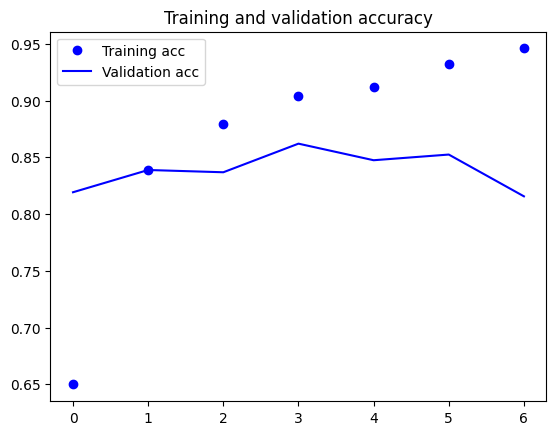

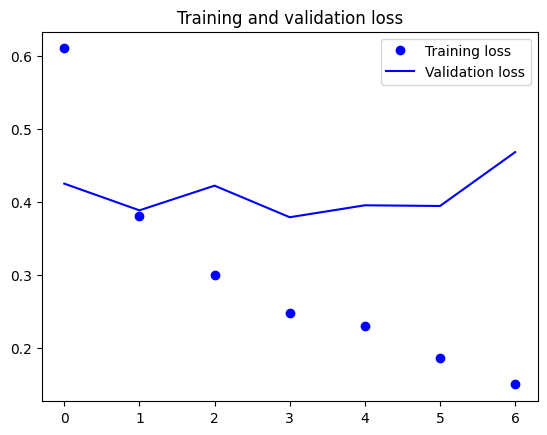

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Graferna visar tydligt att modellen slutar att förbättras på valideringsdatat efter några få epoker.

In [ ]:
# Skapar och tränar en LSTM-modell med samma validationsplit och epoker  osv som tidigare
model1 = Sequential()
model1.add(Embedding(max_features, 32))
model1.add(LSTM(32))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model1.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[earlystop])

Epoch 1/10
157/157 [==============================] - 22s 121ms/step - loss: 0.6211 - acc: 0.6345 - val_loss: 0.4847 - val_acc: 0.7556
Epoch 2/10
157/157 [==============================] - 14s 86ms/step - loss: 0.3766 - acc: 0.8433 - val_loss: 0.3561 - val_acc: 0.8544
Epoch 3/10
157/157 [==============================] - 12s 76ms/step - loss: 0.2867 - acc: 0.8885 - val_loss: 0.3208 - val_acc: 0.8650
Epoch 4/10
157/157 [==============================] - 9s 57ms/step - loss: 0.2495 - acc: 0.9042 - val_loss: 0.3939 - val_acc: 0.8346
Epoch 5/10
157/157 [==============================] - 9s 56ms/step - loss: 0.2139 - acc: 0.9212 - val_loss: 0.3096 - val_acc: 0.8848
Epoch 6/10
157/157 [==============================] - 7s 48ms/step - loss: 0.1922 - acc: 0.9306 - val_loss: 0.4300 - val_acc: 0.8410
Epoch 7/10
157/157 [==============================] - 6s 41ms/step - loss: 0.1735 - acc: 0.9385 - val_loss: 0.3341 - val_acc: 0.8608
Epoch 8/10
157/157 [==============================] - 5s 35ms/ste

LSTM-modellen tränas i 8 epoker innan earlystopping "stänger ner" träningen för att undvika mer överanpassning, valideringsnoggranheten är här mycket högre än den tidigare modellen

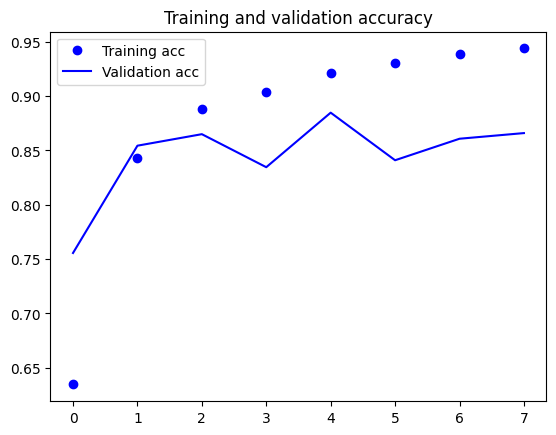

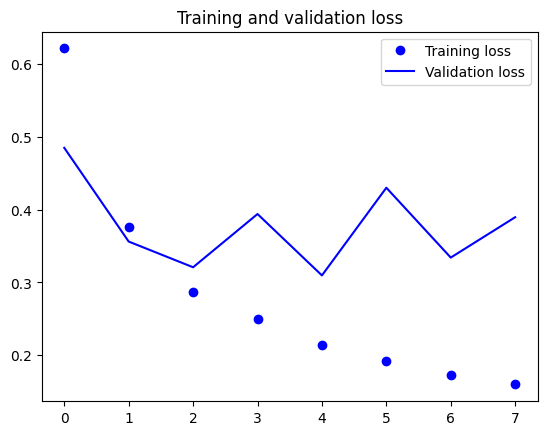

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Överanpassningen är inte lite "grov" som i första modellen men det syns även här tydligt att modellen överanpassar efter några få epoker.

In [ ]:
# Egen större LSTM
# Skapar och tränar en LSTM-modell med samma validationsplit och epoker  osv som tidigare
import tensorflow as tf

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(128,recurrent_regularizer=tf.keras.regularizers.l2(0.3))) # Lagt in ridge regression på vikterna i lagret för att undvika överanpassning nu nör det är större
model.add(Dense(1, activation='sigmoid'))



model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[earlystop]) # lägger in earlystopping i träningen

Epoch 1/10
157/157 [==============================] - 22s 128ms/step - loss: 5.5770 - acc: 0.5732 - val_loss: 0.6444 - val_acc: 0.6406
Epoch 2/10
157/157 [==============================] - 15s 94ms/step - loss: 0.5764 - acc: 0.6982 - val_loss: 0.5597 - val_acc: 0.7144
Epoch 3/10
157/157 [==============================] - 13s 82ms/step - loss: 0.5018 - acc: 0.7649 - val_loss: 0.5468 - val_acc: 0.7346
Epoch 4/10
157/157 [==============================] - 11s 72ms/step - loss: 0.4546 - acc: 0.8063 - val_loss: 0.5476 - val_acc: 0.7708
Epoch 5/10
157/157 [==============================] - 10s 67ms/step - loss: 0.3889 - acc: 0.8648 - val_loss: 0.7320 - val_acc: 0.7620
Epoch 6/10
157/157 [==============================] - 8s 48ms/step - loss: 0.3363 - acc: 0.8921 - val_loss: 0.4272 - val_acc: 0.8450
Epoch 7/10
157/157 [==============================] - 8s 51ms/step - loss: 0.2994 - acc: 0.9082 - val_loss: 0.4427 - val_acc: 0.8176
Epoch 8/10
157/157 [==============================] - 8s 48ms/s

Den större LSTM-modellen med l2 regularisering presterar inte bättre än den lilla LSTM-modellen, träningen går i segare takt med överanpassning sker fortfarande och valideringsnoggrannheten blir inte högre än den lilla modellen

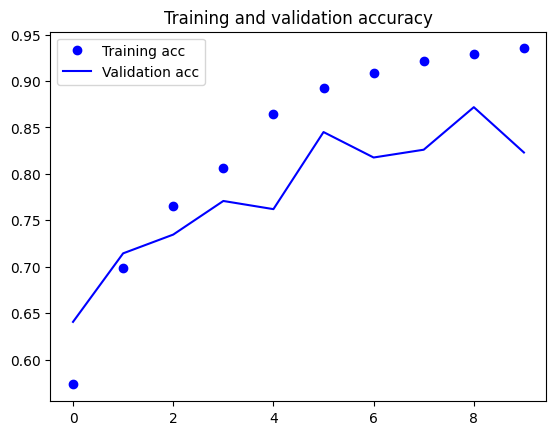

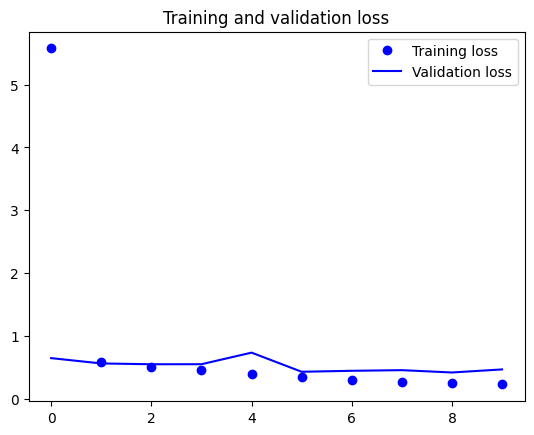

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Vi ser i översta plotten att regulariseringen ändå tagit bort en del av överanpassningen och att kurvorna nu är mer jämna, men att det fortfarande inte är ett bra resultat. Den nedre plotten är svår att se då första epoker fick ett så högt värde för träningsdatat så y-axeln är utdragen.

In [ ]:
# Läser in paket
from keras.layers import Bidirectional
# Egen bidirektionell LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32))) # Lagt in ridge regression på vikterna i lagret för att undvika överanpassning nu nör det är större
model.add(Dense(1, activation='sigmoid'))



model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[earlystop]) # lägger in earlystopping i träningen

Epoch 1/10
157/157 [==============================] - 25s 133ms/step - loss: 0.6329 - acc: 0.6274 - val_loss: 0.4959 - val_acc: 0.7870
Epoch 2/10
157/157 [==============================] - 15s 94ms/step - loss: 0.3925 - acc: 0.8360 - val_loss: 0.3180 - val_acc: 0.8690
Epoch 3/10
157/157 [==============================] - 13s 83ms/step - loss: 0.2933 - acc: 0.8838 - val_loss: 0.3109 - val_acc: 0.8670
Epoch 4/10
157/157 [==============================] - 11s 69ms/step - loss: 0.2445 - acc: 0.9063 - val_loss: 0.3396 - val_acc: 0.8770
Epoch 5/10
157/157 [==============================] - 10s 62ms/step - loss: 0.2138 - acc: 0.9208 - val_loss: 0.3212 - val_acc: 0.8834
Epoch 6/10
157/157 [==============================] - 8s 53ms/step - loss: 0.1886 - acc: 0.9313 - val_loss: 0.3384 - val_acc: 0.8870


Eftersom denna modell både kollar bakåt och framåt blir den bättre på att sätta in orden så de får rätt betydelse, den överanpassar dock och behöver regularisering för att undvika överanpassning, men det är nog den bästa modellen i labben.

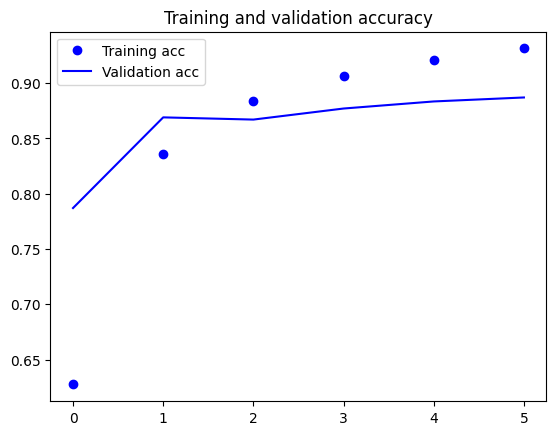

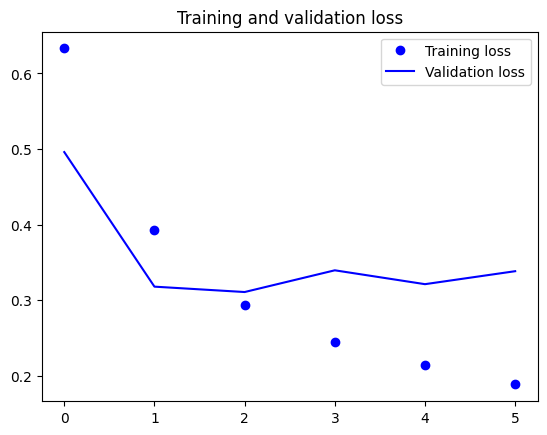

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Även den här modellen överanpassar efter några få epoker, men jämfört med de flesta andra modellerna är den stabil och överanpassar inte i samma magnitud.

# Prediktering

Bi-lstm-modellen är den som jag anser är bäst då den har stabilast valideringsnoggrannhet samtidigt som den är väldigt hög genom de flesta epokerna. validaringsförlusten är också genomgående lägst.

In [ ]:
# Meningarna som ska testas
test_sentences = [
  "That movie was absolutely awful",
  "The acting was a bit lacking",
  "The film was creative and surprising",
  "Absolutely fantastic!",
  "This movie is not worth the money",
  "The only positive thing with this movie is the music"
]


# Kodar om meningarna på samma sätt som imdb-datasetet med kod från labben


# Code to prepare test sentencies for models trained with IMDB data
# Fetch tokenizer and pad_sequences from keras.preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set up tokenizer based on IMDB wordlist
index_offset = 3
tokenizer = Tokenizer()
word_to_id = imdb.get_word_index()
word_to_id = {k: (v + index_offset) for k, v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
tokenizer.word_index = word_to_id

# Prepare test sentences
test_seq = tokenizer.texts_to_sequences(test_sentences)
test_seq_padded = pad_sequences(test_seq, maxlen=maxlen)

# See what the model say about the test sentences
print(model1.predict(test_seq_padded))

1/1 [==============================] - 0s 357ms/step
[[0.08269599]
 [0.6345148 ]
 [0.8615299 ]
 [0.86536574]
 [0.6315543 ]
 [0.4481433 ]]


Modellen har problem med meningar som hamnar nära 0.5, alltså:

* "The acting was a bit lacking" - Förmodlingen för att det inte är jättenegativt utan att bara "a bit lacking"..


* "This movie is not worth the money" - Antar att modellen här har problem att identifiera betydelsen av not i meningen och 'worth the money' ger då ett positivt intryck.


* "The only positive thing with this movie is the music" - Lite samma här att positive lurar modellen lite och detta gör den osäker i predikteringen.

